# <p style="background-color:#B0766D;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EuroMart Sales & Profitability Analysis</p>

- Identify key factors influencing sales and profitability in different regions, product categories, and transaction types to optimize operations and pricing strategies.

- Identifying Top Performers: Pinpoint regions, product categories, and transaction types driving highest sales & profitability to replicate successful strategies.
- Understanding Challenges: Address operational inefficiencies and customer engagement issues in underperforming areas.
- Optimizing Discounts & Shipping Modes: Analyze impact of discounts and shipping modes to refine pricing strategies and logistics for max profitability.
- Leveraging Customer Feedback: Use customer feedback to enhance product offerings and improve overall business performance.
Improving Product Mix: Identify top-selling products and customer preferences to optimize our product mix.

**Note:-** 
- Remove null values and duplicates if Present.

### **Import Necessary Libraries**
Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt     
import seaborn as sns
import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### **Loading Data**
The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In [2]:
df = pd.read_excel(r"D:\Python\EDA\Euromart\EuroMart_Stores_RETAIL_DATA.xlsx")

### **Reading Data**
Analyzing the Data

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.
 
head() will display the top 5 observations of the dataset

In [3]:
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


**tail()** will display the last 5 observations of the dataset

In [65]:
df.tail()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
8042,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,245,91,2,True
8043,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,30,-10,2,False
8044,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,23,-6,4,True
8045,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,108,-19,3,False
8046,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Technology,Phones,"Motorola Audio Dock, VoIP",0.0,867,251,5,False


In [66]:
df.shape

(8047, 17)

shape – shape will display the number of observations(rows) and features(columns) in the dataset

There are 8047 observations and 17 variables in our dataset

In [67]:
df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?'],
      dtype='object')

**info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8047 non-null   object        
 1   Order Date     8047 non-null   datetime64[ns]
 2   Customer Name  8047 non-null   object        
 3   Country        8047 non-null   object        
 4   State          8047 non-null   object        
 5   City           8047 non-null   object        
 6   Region         8047 non-null   object        
 7   Segment        8047 non-null   object        
 8   Ship Mode      8047 non-null   object        
 9   Category       8047 non-null   object        
 10  Sub-Category   8047 non-null   object        
 11  Product Name   8047 non-null   object        
 12  Discount       8047 non-null   float64       
 13  Sales          8047 non-null   int64         
 14  Profit         8047 non-null   int64         
 15  Quantity       8047 n

### **Finding The Missing Values**

**data.info()** shows the variables Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City','Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category','Product Name', 'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?'. Numeric variables like 'Order ID','Discount', 'Sales', 'Profit', 'Quantity', are of datatype as  float64 and int64. Categorical variables like 'Customer Name', 'Country', 'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category', 'Product Name' are of object data type, and feedback are of boolean datatype.

**Check for Duplication**

nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [69]:
df.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Feedback?        0
dtype: int64

There is no missing values in the dataset.

In [70]:
df[df.duplicated()]

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
2543,AZ-2012-5907386,2012-08-29,Louie Knight,Belgium,Antwerp,Mechelen,Central,Consumer,Economy,Office Supplies,Art,"Sanford Pens, Fluorescent",0.0,37,10,3,False
4066,AZ-2013-5637964,2013-06-14,Cynthia Zielinski,Spain,Madrid,Madrid,South,Home Office,Economy,Office Supplies,Binders,"Wilson Jones 3-Hole Punch, Economy",0.0,84,28,3,True


In [71]:
df.duplicated().sum()

2

### **Data Reduction**
#### **Handling Missing Values**

In [72]:
df = df.drop_duplicates()

In [73]:
df.duplicated().sum()

0

#### **Removing unnecessary Columns**
Some columns or variables can be dropped if they do not add value to our analysis.

In our dataset, the column Order ID have only ID values, assuming they don’t have any predictive power to predict the dependent variable.

In [74]:
df = df.drop('Order ID', axis=1)

We start our Feature Engineering as we need to add some columns required for analysis.

### **Feature Engineering**

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

### **Creating Features**

We will play around with the variables Order Date in our dataset. If we see the sample data, the column “Order Date” shows the sale date.

It would be difficult to find the Year & Month wise Sales and Profit.

Introducing a new column, 'Year' , 'Month' to know the sales and Profit distribution on various datetime. 

In [75]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year #df['Order Date'].datetime.year
df['Month'] = pd.DatetimeIndex(df['Order Date']).month

In [76]:
df.head()

,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Year,Month
0,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False,2011,1
1,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True,2011,1
2,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True,2011,1
3,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True,2011,1
4,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True,2011,1


We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process 

Voila!! Our Data is ready to perform EDA.

### **EDA Exploratory Data Analysis**

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

- EDA can be leveraged to check for outliers, patterns, and trends in the given data.
- EDA helps to find meaningful patterns in data.
- EDA provides in-depth insights into the data sets to solve our business problems.
- EDA gives a clue to impute missing values in the dataset

### **Statistics Summary**

The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [77]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,8045,2013-04-19 12:57:32.778123008,2011-01-01 00:00:00,2012-06-08 00:00:00,2013-06-11 00:00:00,2014-04-30 00:00:00,2014-12-31 00:00:00,NaN
Discount,8045.0,0.110075,0.0,0.0,0.0,0.1,0.85,0.181787
Sales,8045.0,291.90317,3.0,48.0,117.0,313.0,6517.0,485.258616
Profit,8045.0,35.202237,-3060.0,1.0,14.0,47.0,2476.0,178.147747
Quantity,8045.0,3.772281,1.0,2.0,3.0,5.0,14.0,2.20361
Year,8045.0,2012.7289,2011.0,2012.0,2013.0,2014.0,2014.0,1.100367
Month,8045.0,7.36532,1.0,5.0,8.0,10.0,12.0,3.321856


Order Date Distribution: The orders in the dataset span from January 1, 2011, to December 31, 2014, with the majority falling between June 2012 and April 2014.

Discount Analysis: The average discount applied to orders is approximately 11%, with a minimum of 0% and a maximum of 85%. 

Sales Performance: The average sales amount per order is ₹291.90. Sales vary widely, with the lowest recorded sale being ₹3.00 and the highest reaching ₹6517.00.

Profit Analysis: The average profit per order is ₹35.20. However, there are instances of losses, with the lowest recorded profit being -₹3060.00. This indicates potential areas for improvement in cost management or pricing strategies.

Temporal Analysis:
- Yearly Trend: The dataset covers predominantly the years 2012 to 2014, with most orders occurring in 2013.
- Monthly Trend: Orders are distributed relatively evenly across the months, with a slight peak observed in October. May indicate seasonality or specific promotional periods.

In [78]:
cat = df.select_dtypes(include='object').columns.tolist()
num = df.select_dtypes(include=np.number).columns.tolist()
print('Catagorical Columns', cat)
print('Numarical Columns', num)

Catagorical Columns ['Customer Name', 'Country', 'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category', 'Product Name']
Numarical Columns ['Discount', 'Sales', 'Profit', 'Quantity', 'Year', 'Month']


### **Univariate Analysis**
Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In our example, we have done a Univariate analysis using Histogram for continuous Variables.

In the below fig, a histogram is used to show the pattern of the variables.

In [79]:
for col in num:
    fig = px.histogram(df, x=col, title=f'{col}', nbins=20, text_auto=True)
    fig.show()

<pre><code>for col in num:
    print(col)
    plt.subplot(1,1,1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.show()</code></pre>

In [80]:
df['State'].value_counts().head(10)

State
England                               1187
Ile-de-France                          673
North Rhine-Westphalia                 572
Provence-Alpes-Côte d'Azur             250
Madrid                                 198
Vienna                                 196
Berlin                                 177
Languedoc-Roussillon-Midi-Pyrénées     172
Auvergne-Rhône-Alpes                   170
Stockholm                              153
Name: count, dtype: int64

In [81]:
# Select top 10 values for 'State' and 'City'
top_states = df['State'].value_counts().head(10).index
top_cities = df['City'].value_counts().head(10).index

# Create subplots
fig = make_subplots(rows=4, cols=2, subplot_titles=('Country', 'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category'))

# Add histograms to subplots with custom names
fig.add_trace(go.Histogram(x=df['Country'], marker_color='blue', name='Country'), row=1, col=1)
fig.add_trace(go.Histogram(x=df[df['State'].isin(top_states)]['State'], marker_color='blue', name='State'), row=1, col=2)
fig.add_trace(go.Histogram(x=df[df['City'].isin(top_cities)]['City'], marker_color='blue', name='City'), row=2, col=1)
fig.add_trace(go.Histogram(x=df['Region'], marker_color='blue', name='Region'), row=2, col=2)
fig.add_trace(go.Histogram(x=df['Segment'], marker_color='blue', name='Segment'), row=3, col=1)
fig.add_trace(go.Histogram(x=df['Ship Mode'], marker_color='blue', name='Ship Mode'), row=3, col=2)
fig.add_trace(go.Histogram(x=df['Category'], marker_color='blue', name='Category'), row=4, col=1)
fig.add_trace(go.Histogram(x=df['Sub-Category'], marker_color='blue', name='Sub-Category'), row=4, col=2)

# Update layout
fig.update_layout(title_text="Distribution of Categorical Variables",height=1500, width=1300)

# Show the plot
fig.show()

<pre><code>fig, axes = plt.subplots(4, 2, figsize = (20, 24))

sns.countplot(ax = axes[0, 0], x = 'Country', data = df, color = 'blue', order = df['Country'].value_counts().index)
sns.countplot(ax = axes[0, 1], x = 'State', data = df, color = 'blue',  order = df['State'].value_counts().head(10).index)
sns.countplot(ax = axes[1, 0], x = 'City', data = df, color = 'blue', order = df['City'].value_counts().head(10).index)
sns.countplot(ax = axes[1, 1], x = 'Region', data = df, color = 'blue', order = df['Region'].value_counts().index)
sns.countplot(ax = axes[2, 0], x = 'Segment', data = df, color = 'blue', order = df['Segment'].value_counts().index)
sns.countplot(ax = axes[2, 1], x = 'Ship Mode', data = df, color = 'blue', order = df['Ship Mode'].value_counts().index)
sns.countplot(ax = axes[3, 0], x = 'Category', data = df, color = 'blue', order = df['Category'].value_counts().index)
sns.countplot(ax = axes[3, 1], x = 'Sub-Category', data = df, color = 'blue', order = df['Sub-Category'].value_counts().index)

axes[0][0].tick_params(labelrotation=75)
axes[0][1].tick_params(labelrotation=75)
axes[1][0].tick_params(labelrotation=90) 
axes[3][1].tick_params(labelrotation=90)

plt.show()</code></pre>

- France has the highest sales, followed by Germany and the United Kingdom.
- England leads in sales in the state category, followed by Ile-de-France and North Rhine-Westphalia.
- London and Vienna top the sales charts in the city category, followed by Berlin and Madrid.
- The consumer segment experiences the highest purchasing activity.
- Economy shipment mode prevails in sales, followed by economy plus.
- Office supplies are the most purchased items, followed by technology.
- Art, binders, and storage items are the best-selling products.

### **Multivariate Analysis**

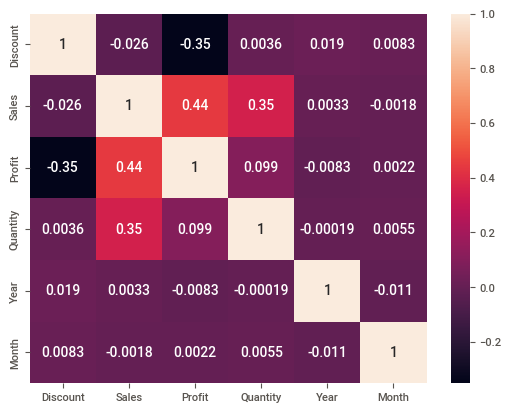

In [82]:
corr = df[num].corr()
sns.heatmap(corr, annot=True)
plt.show()

Heatmap provides below insights:
- Sales has a positive correlation with Profit and Quantity
- A Discount has a Negative Correlation with Profit
- Profit has a Positive Correlation with Sales

#### **1.Net Sales**

In [83]:
net_sales = df['Sales'].sum()
print('The total net sales amount र',net_sales)

The total net sales amount र 2348361


#### **2.Net Profit**

In [84]:
net_profit = df['Profit'].sum()
print('The total net Profit amount : र',net_profit)

The total net Profit amount : र 283202


In [85]:
profit_percentage = (net_profit/net_sales) * 100
print(f"The profit margin stands at {profit_percentage:.2f} % of the total net sales.")

The profit margin stands at 12.06 % of the total net sales.


#### **3.Which country has the highest sales, and which has the highest profit?**

In [86]:
country_sales = df.groupby('Country')[['Sales', 'Profit']].sum().sort_values(by=['Sales','Profit'], ascending=False).style.background_gradient(cmap='PuBu')
country_sales

,Sales,Profit
Country,,
France,609683,70067
Germany,488681,86279
United Kingdom,420497,90382
Italy,252742,15802
Spain,249318,47039
Austria,79382,21332
Netherlands,70313,-37188
Belgium,42283,9902
Sweden,30490,-17524


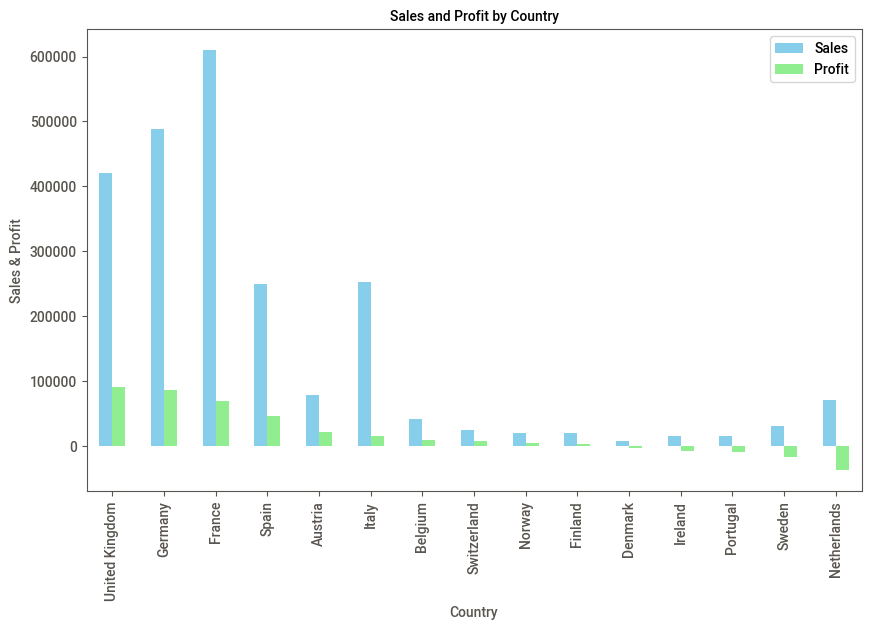

In [87]:
df.groupby('Country')[['Sales', 'Profit']].sum().sort_values(by=['Profit','Sales'], ascending=False).plot.bar(figsize=(10, 6),fontsize=10, color=['skyblue', 'lightgreen'])
plt.title("Sales and Profit by Country", fontsize=10)
plt.xlabel("Country")
plt.ylabel("Sales & Profit")

plt.show()

- Top Performers: France, Germany, and the United Kingdom stand out as the top performers in both sales and profit.
- Profitable Markets: These countries, along with Italy and Spain, demonstrate significant profits despite varying sales volumes.
- Challenges: Some countries, such as Sweden, Ireland, Portugal, and Denmark, face challenges with sales and profitability, with losses incurred in their operations.
- Mixed Results: Countries like Austria, Switzerland, and Finland show moderate sales figures with varying levels of profitability.
- Netherlands' Losses: Notably, the Netherlands experienced a loss despite achieving considerable sales, indicating potential issues with cost management or pricing strategies.

#### **4.Which State has the highest sales, and which has the highest profit?**

In [88]:
df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by=['Sales','Profit'], ascending=False).head(10).style.background_gradient(cmap='PuBu')

,Sales,Profit
State,,
England,378984,79069
Ile-de-France,230138,29457
North Rhine-Westphalia,170233,32572
Provence-Alpes-Côte d'Azur,81524,11615
Madrid,57123,13245
Auvergne-Rhône-Alpes,55572,9283
Berlin,52555,5942
Nord-Pas-de-Calais-Picardie,52007,5207
Vienna,51844,13207


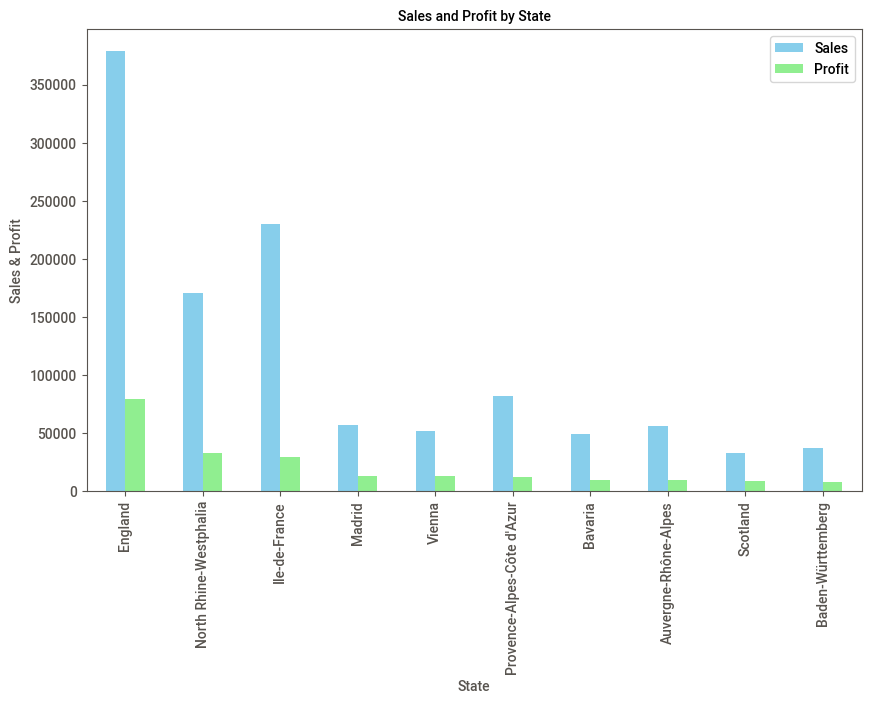

In [89]:
df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by=['Profit','Sales'], ascending=False).head(10).plot.bar(figsize=(10, 6), fontsize=10, color=['skyblue', 'lightgreen'])
plt.title("Sales and Profit by State", fontsize=10)
plt.xlabel("State")
plt.ylabel("Sales & Profit")

plt.show()

- Top Performers: England leads in both sales and profit, followed by Ile-de-France and North Rhine-Westphalia.
- Regional Variances: Madrid and Vienna show notable sales and profit figures, indicating strong performance in these regions compared to others.
- Challenges in Certain Regions: Bavaria and Berlin, despite moderate sales, have comparatively lower profit margins, suggesting potential operational or cost-efficiency issues in these areas.

#### **5.Which City has the highest sales, and which has the highest profit?**

In [90]:
df.groupby('City')[['Sales', 'Profit']].sum().sort_values(by=['Sales','Profit'], ascending=False).head(10).style.background_gradient(cmap='PuBu')

,Sales,Profit
City,,
London,69230,13931
Berlin,52555,5942
Vienna,51844,13207
Madrid,44897,11101
Paris,42245,6680
Rome,28330,191
Barcelona,27405,2246
Hamburg,23574,5858
Marseille,21677,2889


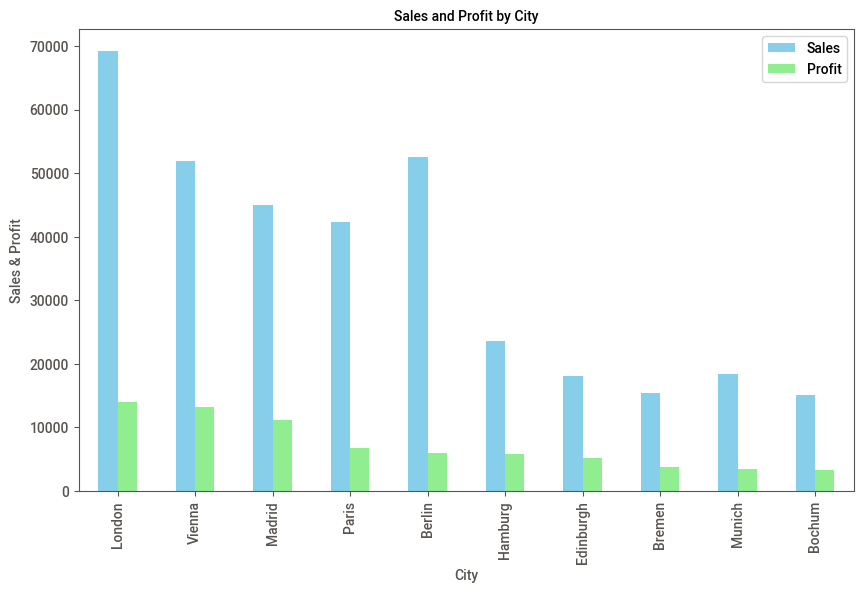

In [91]:
df.groupby('City')[['Sales', 'Profit']].sum().sort_values(by=['Profit','Sales'], ascending=False).head(10).plot.bar(figsize=(10, 6), fontsize=10, color=['skyblue', 'lightgreen'])
plt.title("Sales and Profit by City", fontsize=10)
plt.xlabel("City")
plt.ylabel("Sales & Profit")

plt.show()

- London Leading: London emerges as the top performer in both sales and profit, showcasing strong market activity.
- Vienna's Profitability: Vienna demonstrates a high profit margin despite slightly lower sales compared to London, indicating efficient operations or pricing strategies.
- Challenges in Rome: While Rome shows moderate sales, the profit margin is notably low, suggesting potential issues with cost management or pricing strategies in this city.

#### **6.Which Region has the highest sales, and which has the highest profit?**

In [92]:
df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by=['Sales','Profit'], ascending=False).style.background_gradient(cmap='PuBu')


,Sales,Profit
Region,,
Central,1315216,157626
South,517166,54137
North,515979,71439


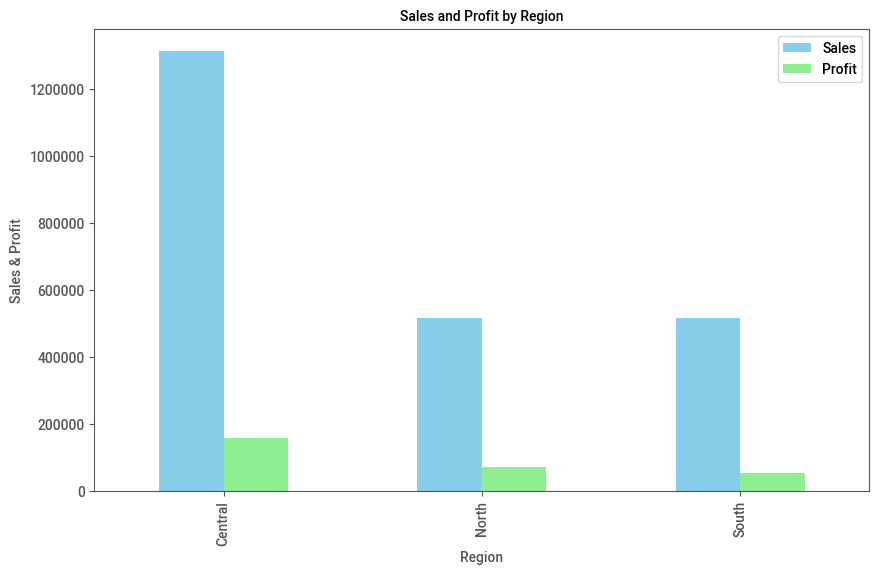

In [93]:
df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by=['Profit','Sales'], ascending=False).plot.bar(figsize=(10, 6), fontsize=10, color=['skyblue', 'lightgreen'])
plt.title("Sales and Profit by Region", fontsize=10)
plt.xlabel("Region")
plt.ylabel("Sales & Profit")

plt.show()

- Central Region Dominance: The Central region leads significantly in both sales and profit, indicating a strong market presence and effective operations.
- Balanced Performance in North and South: While the North and South regions have relatively lower sales compared to the Central region, they still maintain decent profit margins, suggesting balanced performance across different geographical areas.

#### **7.Which Segment contribute the most to sales and profit?**

In [94]:
df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by=['Sales','Profit'], ascending=False).style.background_gradient(cmap='Greens')


,Sales,Profit
Segment,,
Consumer,1236245,147437
Corporate,738137,92634
Home Office,373979,43131


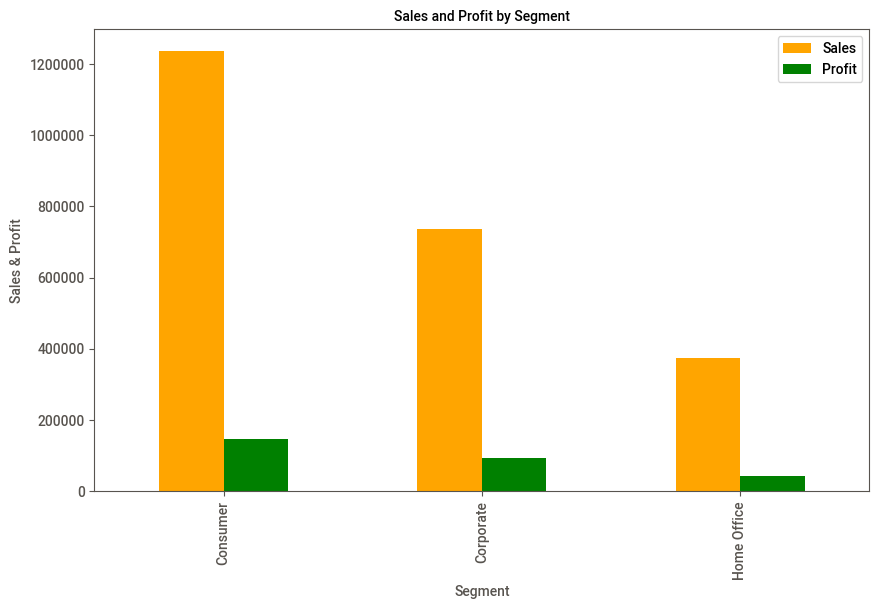

In [95]:
df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by=['Profit','Sales'], ascending=False).plot.bar(figsize=(10, 6), fontsize=10, color=['orange', 'green'])
plt.title("Sales and Profit by Segment", fontsize=10)
plt.xlabel("Segment")
plt.ylabel("Sales & Profit")

plt.show()

- Consumer Segment Dominance: The consumer segment stands out with the highest sales and profit among all segments, indicating strong demand and profitability.
- Corporate Segment: While the corporate segment follows in terms of sales, it shows a notable profit margin, suggesting efficient operations or pricing strategies.
- Home Office Segment: Although the home office segment has the lowest sales, it still maintains a decent profit margin, contributing to overall profitability.

#### **8.Which Ship Mode contribute the most to sales and profit?**

In [96]:
df.groupby('Ship Mode')[['Sales', 'Profit']].sum().sort_values(by=['Sales','Profit'], ascending=False).style.background_gradient(cmap='Blues')

,Sales,Profit
Ship Mode,,
Economy,1412656,178658
Economy Plus,483965,54336
Priority,320426,32639
Immediate,131314,17569


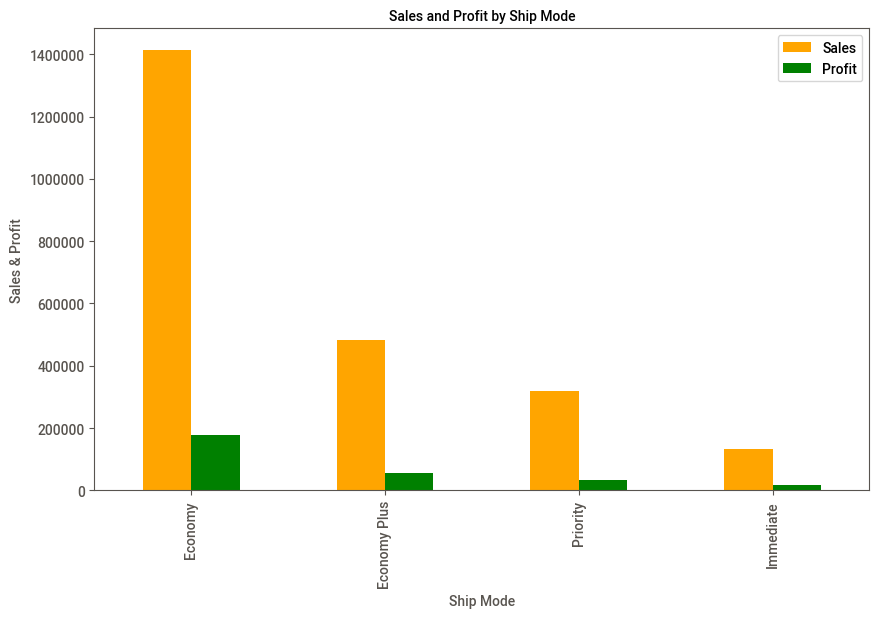

In [97]:
df.groupby('Ship Mode')[['Sales', 'Profit']].sum().sort_values(by=['Profit','Sales'], ascending=False).plot.bar(figsize=(10, 6), fontsize=10, color=['orange', 'green'])
plt.title("Sales and Profit by Ship Mode", fontsize=10)
plt.xlabel("Ship Mode")
plt.ylabel("Sales & Profit")

plt.show()

- Economy Ship Mode Dominance: Economy ship mode stands out with the highest sales and profit among all ship modes, indicating its popularity and profitability.
- Economy Plus: While economy plus follows in terms of sales, it still maintains a respectable profit margin, suggesting its significance in the overall revenue generation.
- Priority and Immediate: These ship modes contribute to sales and profit, although they have comparatively lower figures compared to economy and economy plus.

#### **9.Which product categories contribute the most to sales and profit?**

In [98]:
df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by=['Sales','Profit'], ascending=False).style.background_gradient(cmap='Blues')

,Sales,Profit
Category,,
Technology,886015,108554
Office Supplies,823537,124914
Furniture,638809,49734


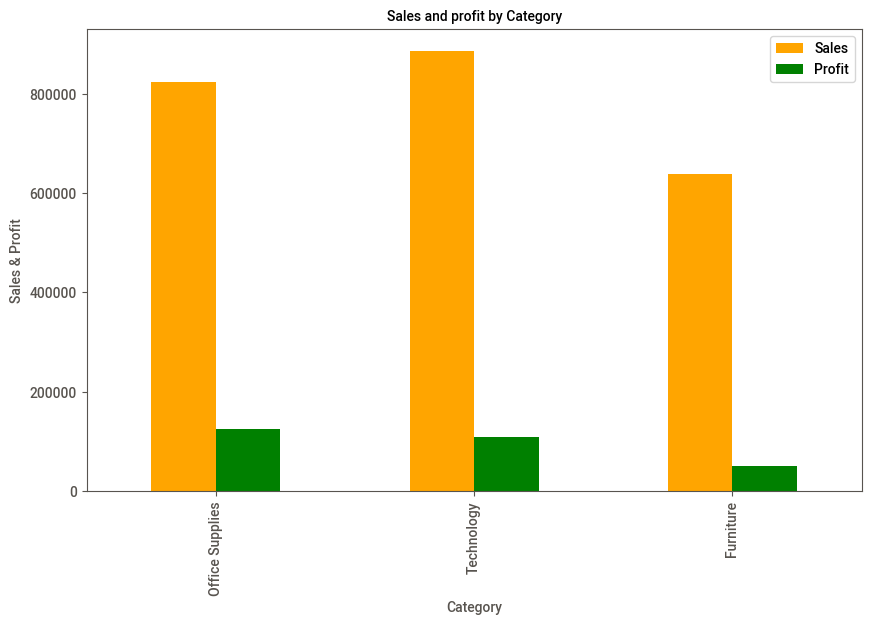

In [99]:
df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by=['Profit','Sales'], ascending=False).plot.bar(figsize=(10, 6), fontsize=10, color=['orange', 'green'])
plt.title("Sales and profit by Category", fontsize=10)
plt.xlabel("Category")
plt.ylabel("Sales & Profit")

plt.show()

- Technology Segment Dominance: Technology emerges as the leading category in terms of sales, closely followed by office supplies.
- Profit Margin: Although office supplies have slightly lower sales compared to technology, they exhibit a higher profit margin, indicating their importance in generating profitability.
- Furniture Segment: While furniture has decent sales figures, its profit margin is comparatively lower, suggesting potential challenges or lower profit margins in this category.

#### **10.Which product categories contribute the most to sales and profit?**

In [100]:
df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by=['Sales','Profit'], ascending=False).style.background_gradient(cmap='Blues')

,Sales,Profit
Sub-Category,,
Bookcases,294396,43655
Copiers,290081,42775
Phones,282559,27631
Storage,272489,21995
Appliances,209900,37906
Chairs,186698,15489
Machines,182066,11318
Accessories,131309,26830
Art,127147,23481


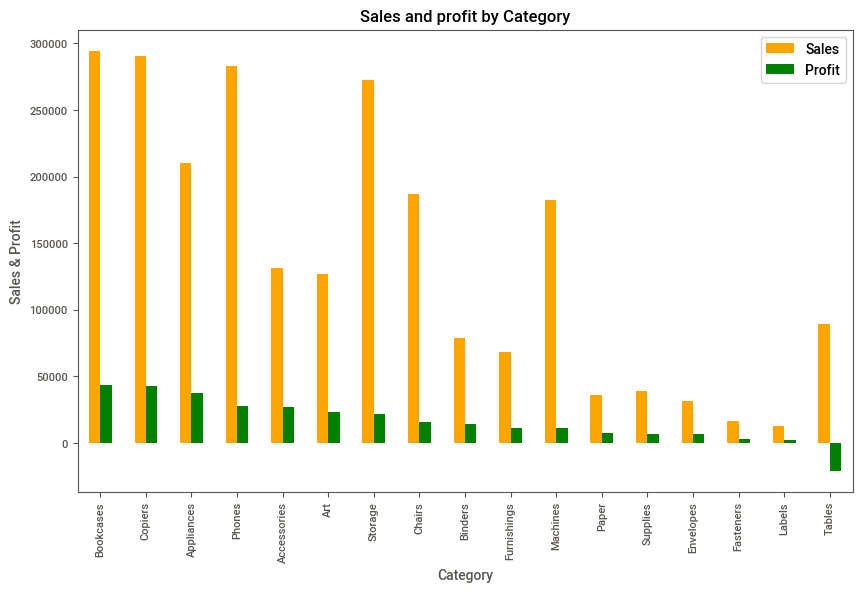

In [101]:
df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by=['Profit','Sales'], ascending=False).plot.bar(figsize=(10, 6), color=['orange', 'green'])
plt.title("Sales and profit by Category")
plt.xlabel("Category")
plt.ylabel("Sales & Profit")

plt.show()

- Top Performing Sub-Categories: Bookcases and copiers emerge as the top-performing sub-categories, boasting high sales figures and significant profits.
- Profitable Sub-Categories: Despite lower sales volumes, accessories, art, and appliances demonstrate notable profit margins, indicating their importance in generating profitability.
- Challenges in Tables Sub-Category: The tables sub-category shows a negative profit, suggesting potential issues such as high costs or pricing strategies that need attention.

#### **11.Sales By Year and Month**

In [102]:
df.groupby('Year')[['Sales', 'Profit']].sum().sort_values(by=['Profit','Sales'], ascending=False).style.background_gradient(cmap='Blues')

,Sales,Profit
Year,,
2014,755030,85330
2013,630140,77172
2012,548843,66213
2011,414348,54487


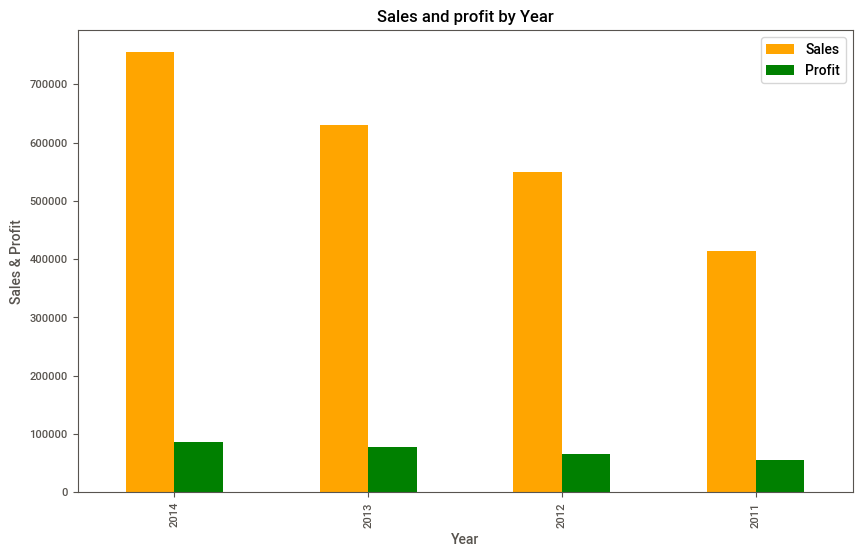

In [103]:
df.groupby('Year')[['Sales', 'Profit']].sum().sort_values(by=['Profit','Sales'], ascending=False).plot.bar(figsize=(10, 6), color=['orange', 'green'])
plt.title("Sales and profit by Year")
plt.xlabel("Year")
plt.ylabel("Sales & Profit")

plt.show()

In [104]:
sales_year = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)

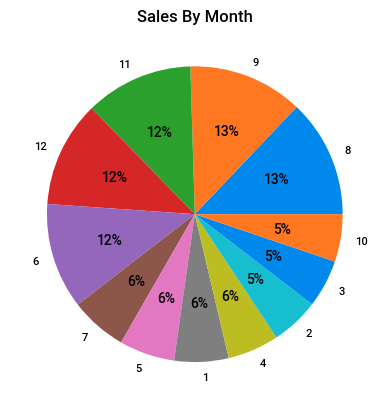

In [105]:
plt.pie(sales_year, labels=sales_year.index, autopct='%1.f%%')
plt.title('Sales By Month')
plt.show()

In [106]:
profit_month = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)
profit_month

Month
8     303089
9     295289
11    277239
12    272751
6     271744
7     146159
5     142461
1     139157
4     132051
2     123685
3     122875
10    121861
Name: Sales, dtype: int64

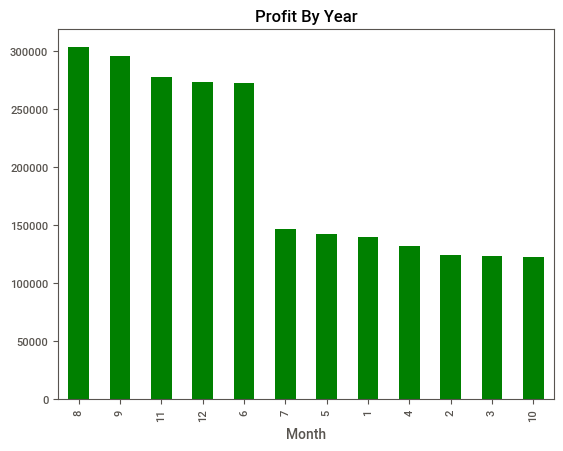

In [107]:
df.groupby('Month')['Sales'].sum().sort_values(ascending=False).plot.bar(color = 'green')
plt.title("Profit By Year")
plt.show()

In [108]:
df['Quantity'].value_counts()

Quantity
3     1978
2     1971
4     1000
5      938
1      681
6      474
7      468
8      206
9      180
11      44
10      43
12      26
14      19
13      17
Name: count, dtype: int64

#### **12.Quantity Distribution**

C:\Users\Admin\AppData\Local\Temp\ipykernel_17164\1519201627.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Quantity', ylabel='count'>

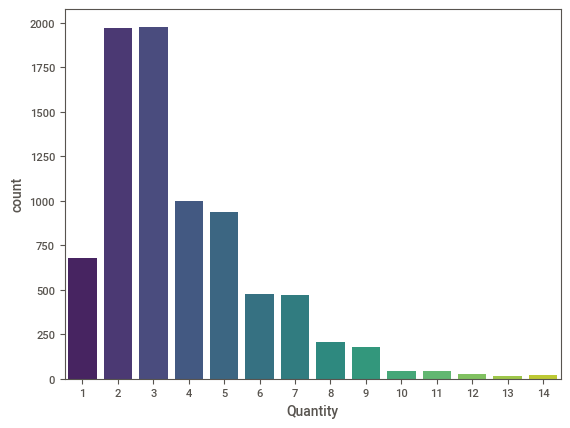

In [109]:
sns.countplot(x='Quantity', data=df, palette='viridis')

- Most Common Quantity: The quantities 2 and 3 are the most common, with counts of 1971 and 1978 respectively.

#### **13.What is the overall trend in sales and profit over the years?**

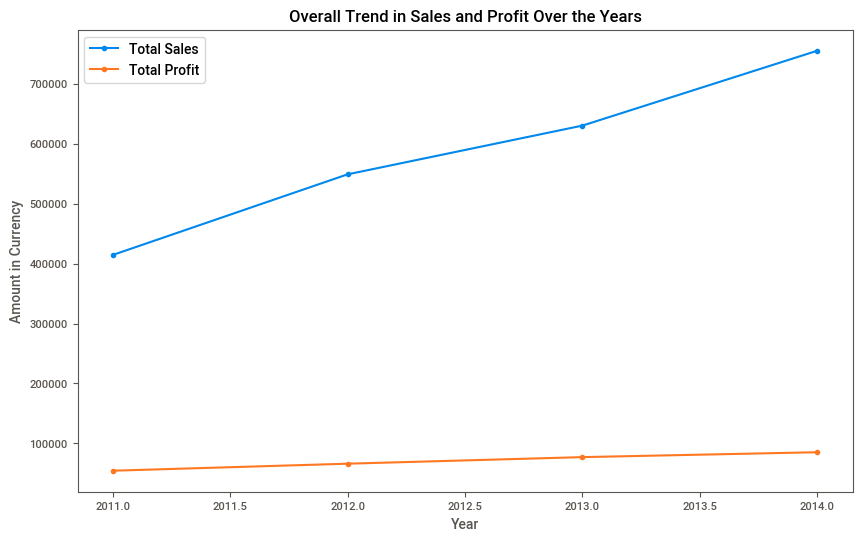

In [110]:
# Group data by 'Year' and calculate total sales and profit for each year
yearly_data = df.groupby('Year').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Plotting the trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['Sales'], label='Total Sales', marker='o')
plt.plot(yearly_data['Year'], yearly_data['Profit'], label='Total Profit', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Amount in Currency')
plt.title('Overall Trend in Sales and Profit Over the Years')
plt.legend()

# Show the plot
plt.show()

- Sales Trend: There is a general increasing trend in sales over the years, with 2014 showing the highest sales figures.
- Profitability: Profit also shows an increasing trend over the years, reflecting positive growth and performance.
- Steady Growth: The data suggests a steady growth trajectory in both sales and profit over the four-year period, indicating overall positive performance and market expansion.

#### **14.What are the top 5 best-selling products in terms of quantity?**

In [111]:
# Group data by 'Product Name' and calculate total quantity sold for each product
product_quantity = df.groupby('Product Name')['Quantity'].sum().reset_index()

# Sort the data by total quantity in descending order
product_quantity_sorted = product_quantity.sort_values(by='Quantity', ascending=False)

# Get the top 5 best-selling products
top_5_products = product_quantity_sorted.head(5)

# Display the top 5 best-selling products
print(top_5_products)

                               Product Name  Quantity
1367         Rogers File Cart, Single Width       108
582           Eldon File Cart, Single Width       104
293         Binney & Smith Sketch Pad, Blue        90
1645  Stanley Pencil Sharpener, Water Color        89
183                  Avery Index Tab, Clear        81


- Top Selling Products: The top-selling products based on quantity sold are the "Rogers File Cart, Single Width" and the "Eldon File Cart, Single Width," indicating high demand for file carts.
- Popular Stationery: Stationery items such as the "Binney & Smith Sketch Pad, Blue" and the "Stanley Pencil Sharpener, Water Color" also show considerable sales quantities, suggesting a demand for office supplies.
- Index Tab Sales: The "Avery Index Tab, Clear" also has notable sales, indicating a need for organizational accessories.

#### **15.How does the presence of discounts affect sales and profit?**

In [112]:
discount_analysis = df.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index().sort_values(by='Sales', ascending=False).style.background_gradient(cmap='Blues')
discount_analysis

,Discount,Sales,Profit
7,0.450000,1273.500000,-552.000000
5,0.350000,1270.108108,-225.135135
2,0.150000,668.515679,58.010453
11,0.700000,609.666667,-916.166667
13,0.850000,555.000000,-1925.000000
1,0.100000,435.480608,72.676046
10,0.650000,389.857143,-375.714286
3,0.200000,334.927273,15.500000
6,0.400000,261.167347,-78.644898
0,0.000000,251.222132,63.813124


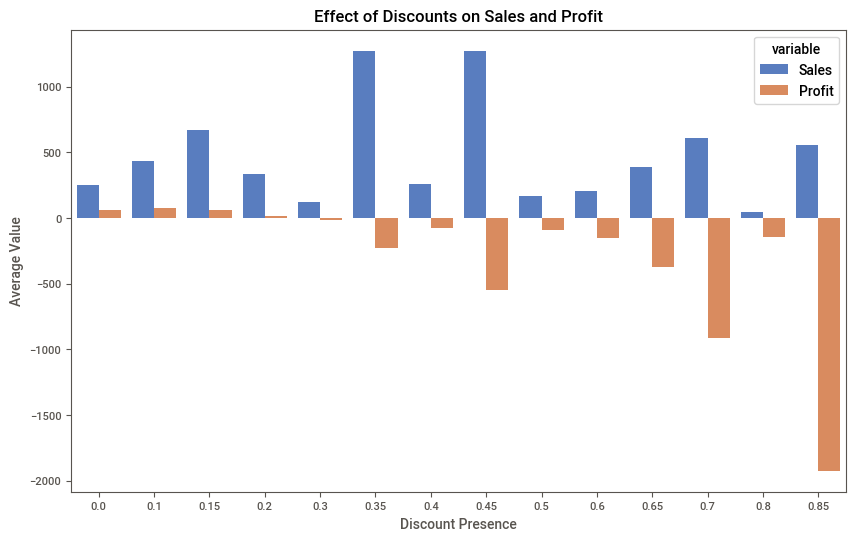

In [113]:
# Group data by 'Discount' and calculate average sales and profit for each group
discount_analysis = df.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

# Melt and plot the DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='value', hue='variable', data=pd.melt(discount_analysis, id_vars='Discount'), palette='muted')

# Adding labels and title
plt.xlabel('Discount Presence')
plt.ylabel('Average Value')
plt.title('Effect of Discounts on Sales and Profit')

# Display the plot
plt.show()

- Impact of Discounts on Profit: There is a noticeable decrease in profit as the discount rate increases beyond 0.15. Discounts of 0.35 and above result in negative profits, indicating potential loss-making transactions.
- Sales Variability: Sales figures fluctuate across different discount rates, with some rates contributing to significantly higher sales, such as 0.35 and 0.45.
- Profitability Threshold: It's essential to analyze the profitability threshold for discounts to ensure that they contribute positively to overall profitability rather than causing losses.

#### **16.Does the presence of feedback affect sales or profit?**

In [114]:
feedback_analysis = df.groupby('Feedback?').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()
print(feedback_analysis)

   Feedback?       Sales     Profit
0      False  288.743552  34.951885
1       True  295.077747  35.453775


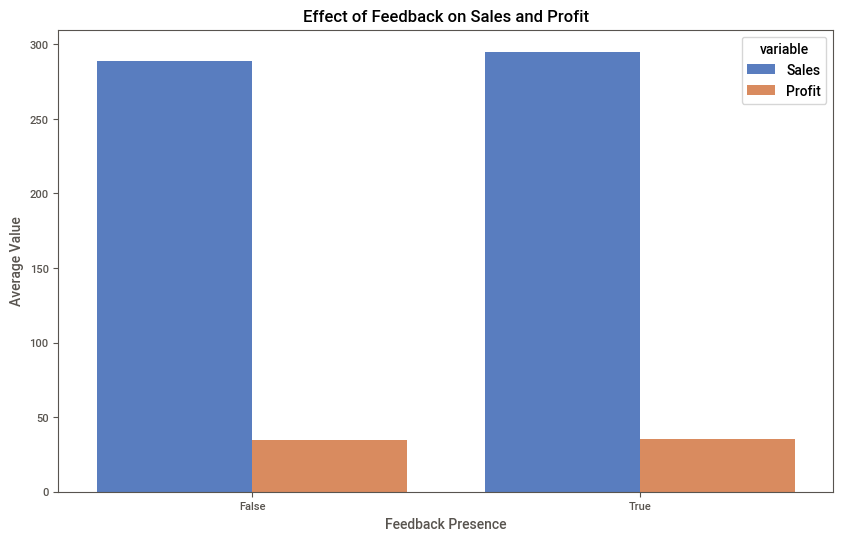

In [115]:
# Group data by 'Discount' and calculate average sales and profit for each group
feedback_analysis = df.groupby('Feedback?').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

# Melt and plot the DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x='Feedback?', y='value', hue='variable', data=pd.melt(feedback_analysis, id_vars='Feedback?'), palette='muted')

# Adding labels and title
plt.xlabel('Feedback Presence')
plt.ylabel('Average Value')
plt.title('Effect of Feedback on Sales and Profit')

# Display the plot
plt.show()

- Feedback Influence: There's a slight difference in both sales and profit between transactions with and without feedback. Sales and profit are higher when feedback is present, indicating a potential correlation between customer feedback and increased sales and profitability.
- Marginally Higher Values: Sales and profit values are marginally higher for transactions with feedback compared to those without, suggesting that customer feedback might contribute positively to business performance.

#### **17.Which products or categories receive the most feedback?**

In [116]:
feedback_counts = df.groupby(['Product Name', 'Category']).agg({'Feedback?': 'count'}).reset_index()

feedback_counts_sorted = feedback_counts.sort_values(by='Feedback?', ascending=False)

print("Products or categories with the most feedback:")
print(feedback_counts_sorted.head(10))

Products or categories with the most feedback:
                               Product Name         Category  Feedback?
582           Eldon File Cart, Single Width  Office Supplies         26
1367         Rogers File Cart, Single Width  Office Supplies         23
1645  Stanley Pencil Sharpener, Water Color  Office Supplies         22
1532  Sanford Pencil Sharpener, Water Color  Office Supplies         22
1732          Tenex File Cart, Single Width  Office Supplies         21
183                  Avery Index Tab, Clear  Office Supplies         21
311    Boston Pencil Sharpener, Water Color  Office Supplies         20
293         Binney & Smith Sketch Pad, Blue  Office Supplies         19
1379            Rogers Shelving, Wire Frame  Office Supplies         18
993                  Ibico Index Tab, Clear  Office Supplies         18


- Most Feedback: The "Eldon File Cart, Single Width" received the highest feedback of 14, making it the product with the most feedback.
- Diverse Categories: The products with the most feedback mainly belong to the "Office Supplies" category, indicating a significant amount of customer engagement and interest in this category.
- Technology Product: The "Nokia Smart Phone, Full Size" stands out as the only product from the "Technology" category among those with the most feedback, suggesting a strong customer response to technological products as well.

#### **18.Does the choice of shipping mode impact sales or profit?**

In [117]:
discount_analysis = df.groupby('Ship Mode').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index().sort_values(by='Sales', ascending=False).style.background_gradient(cmap='Blues')
discount_analysis

,Ship Mode,Sales,Profit
2,Immediate,308.248826,41.241784
1,Economy Plus,304.380503,34.173585
0,Economy,290.669959,36.760905
3,Priority,274.102652,27.920445


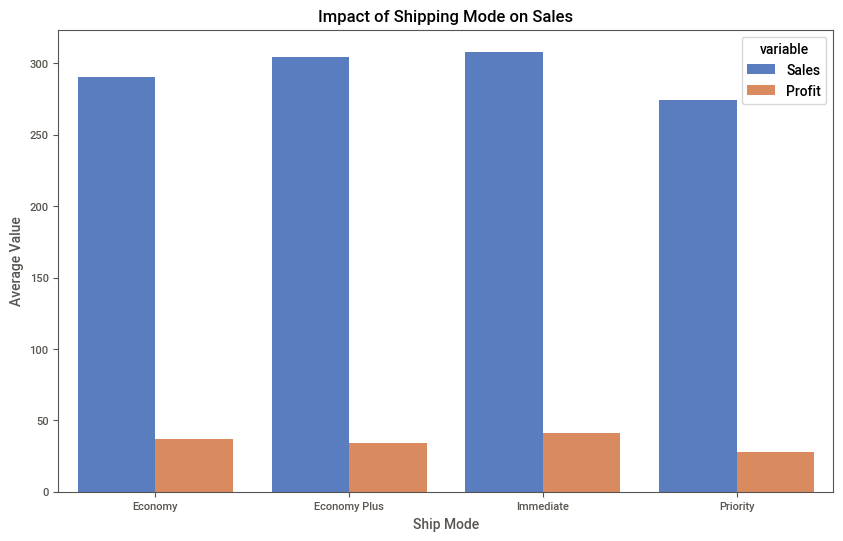

In [118]:
# Group data by 'Discount' and calculate average sales and profit for each group
discount_analysis = df.groupby('Ship Mode').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

# Melt and plot the DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='value', hue='variable', data=pd.melt(discount_analysis, id_vars='Ship Mode'), palette='muted')

# Adding labels and title
plt.xlabel('Ship Mode')
plt.ylabel('Average Value')
plt.title('Impact of Shipping Mode on Sales')

# Display the plot
plt.show()

- Immediate Ship Mode: The "Immediate" ship mode has the highest sales and profit among the listed ship modes, indicating its effectiveness in generating revenue and profitability.
- Economy Ship Modes: Both "Economy" and "Economy Plus" ship modes have similar sales figures, but "Economy" has a higher profit margin, suggesting potentially better cost efficiency or pricing strategies.
- Priority Ship Mode: The "Priority" ship mode, despite lower sales compared to the others, still maintains a respectable profit margin.

#### **19. What are the top 10 locations in terms of sales for the year 2014, considering the hierarchy of Country, State, and City?**

In [119]:
Sales_year = df[df['Year'] == 2014].sort_values(by='Sales',ascending=False).head(10)
px.sunburst(Sales_year, path=['Country','State', 'City'],values='Sales')

- I have focus on the one year sales distribution which is 2014
- In the year of 2014 united kindom and France has the highest sales 
- further city wise England and Ile-de-France has the highest sales

#### **20. "What are the top countries in terms of total sales, and how does their sales distribution look across the globe?**

In [120]:
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()

# Using Plotly Express to create a geographical scatter plot
plot = px.scatter_geo(sales_by_country, locations="Country", locationmode='country names', 
                      color="Sales", hover_name="Country", size="Sales", 
                      projection="natural earth")
plot.show()

- The top countries in terms of total sales, and their sales distribution look across the globe

### **Conclusions:**
The provided data reveals a positive sales trend over the years, with 2014 exhibiting the highest sales figures. Profitability analysis indicates varying margins across categories and ship modes, with technology and office supplies demonstrating higher profitability. Discounts influence sales and profits, but higher rates often lead to lower profits. Most transactions involve quantities of 2 or 3, while larger orders are less frequent. Customer feedback plays a crucial role, highlighting strong engagement and areas for improvement in products and services.

#### **Automation EDA**

In [121]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('report.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
